###Installing the necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

###Importing the data

In [2]:
df = pd.read_csv("SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


####Basic statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
n = len(pd.unique(df['Category']))
  
print("No.of.unique category :", 
      n)
m = len(pd.unique(df['Sub-Category']))
  
print("No.of.unique sub categories :", 
      m)
c = len(pd.unique(df['City']))
  
print("No.of.unique Cities :", 
      c)

No.of.unique category : 3
No.of.unique sub categories : 17
No.of.unique Cities : 531


In [13]:
N = pd.unique(df['Category'])
print("unique categories :",N)
M = pd.unique(df['Sub-Category'])
print("unique sub category :",M)

unique categories : ['Furniture' 'Office Supplies' 'Technology']
unique sub category : ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [ ]:
df.groupby(['City'], as_index=False)['Sales'].sum().round(2).max()

City          Yuma
Sales    256368.16
dtype: object

###Plotting sale and profit columns

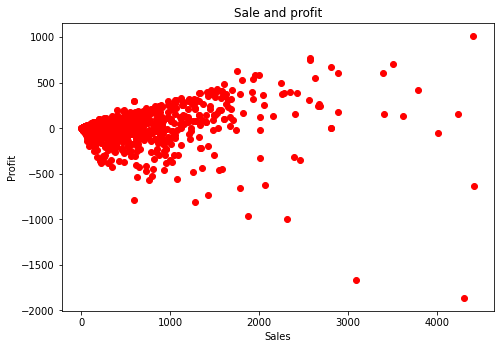

In [ ]:
furniture = df[df.Category == 'Furniture']
sales = furniture.Sales
profit = furniture.Profit
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(sales, profit, color='r')
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_title('Sale and profit')
plt.show()

###Total sale and profit by catagory

In [ ]:
df.groupby(['Category'], as_index=False)['Sales'].sum().round(2)

,Category,Sales
0,Furniture,741999.80
1,Office Supplies,719047.03
2,Technology,836154.03


In [ ]:
df.groupby(['Category'], as_index=False)['Profit'].sum().round(2)

,Category,Profit
0,Furniture,18451.27
1,Office Supplies,122490.80
2,Technology,145454.95


for some reason furnitures have very less profit so we need to look into it to understand why profit is so low 

In [ ]:
lose = furniture[furniture.Profit <= 0].Profit.sum().round(2)
profit = furniture[furniture.Profit >= 0].Profit.sum().round(2)
print('Amount of money we lost in furniture: ', lose)
print('Amount of money we profited in furniture: ', profit)
print('Total sale of furniture: ', sales.sum().round(2))

Amount of money we lost in furniture:  -60936.11
Amount of money we profited in furniture:  79387.38
Total sale of furniture:  741999.8


according to google profit margin on furnitures is 45% but here its 2.6% either we are paying more for furniture or we cant selling them for much more profit 

#####checking if margin is below due to discounts

In [ ]:
discount = furniture.Discount
discount.sum()

368.89

####Checking subcatagories of furnitures

In [ ]:
furniture.groupby(['Sub-Category'], as_index=False)['Sales'].sum().round(2)

,Sub-Category,Sales
0,Bookcases,114880.00
1,Chairs,328449.10
2,Furnishings,91705.16
3,Tables,206965.53


In [ ]:
furniture.groupby(['Sub-Category'], as_index=False)['Profit'].sum().round(2)

,Sub-Category,Profit
0,Bookcases,-3472.56
1,Chairs,26590.17
2,Furnishings,13059.14
3,Tables,-17725.48


ah yes! thats why we need to change the table and book case suppliers find someone cheaper

###Checking different type of buyers

In [ ]:
furniture.groupby(['Ship Mode'], as_index=False)['Sales'].mean()

,Ship Mode,Sales
0,First Class,338.625452
1,Same Day,328.981336
2,Second Class,366.016451
3,Standard Class,349.223933


In [ ]:
furniture.groupby(['Segment'], as_index=False)['Sales'].mean()

,Segment,Sales
0,Consumer,351.347091
1,Corporate,354.519792
2,Home Office,336.825131


In [ ]:
furniture.groupby(['Segment'], as_index=False)['Quantity'].mean()

,Segment,Quantity
0,Consumer,3.743037
1,Corporate,3.862229
2,Home Office,3.776243


###Sales by States

In [14]:
grouped = df.groupby(['State'], as_index=False)['Sales'].sum().reset_index()
grouped_sorted = grouped.sort_values('Sales', ascending=False)
grouped_sorted = grouped_sorted.drop('index', axis = 1)
topten = grouped_sorted.nlargest(10, columns=['Sales'])

####top 10 states by sales 

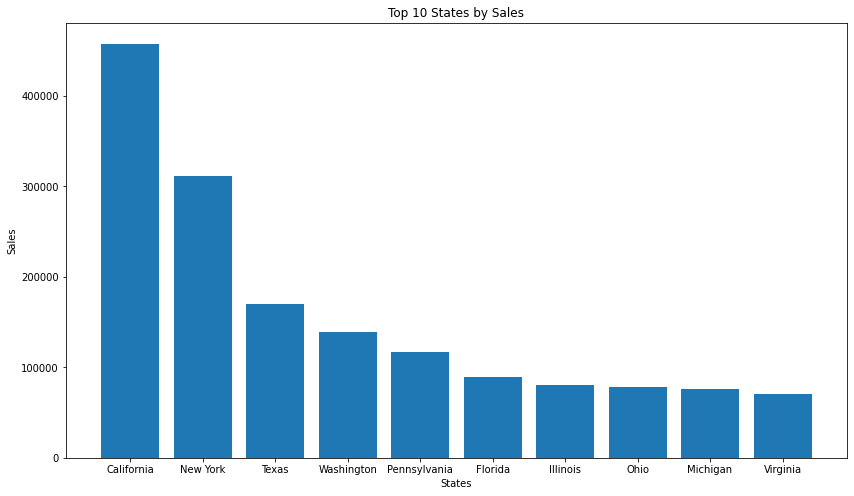

In [27]:
plt.figure(figsize=(14, 8))
plt.xticks(range(len(topten)), topten.State)
plt.xlabel('States')
plt.ylabel('Sales')
plt.title('Top 10 States by Sales')
plt.bar(range(len(topten)), topten.Sales) 
plt.show()

####Bottom 10 States by sales

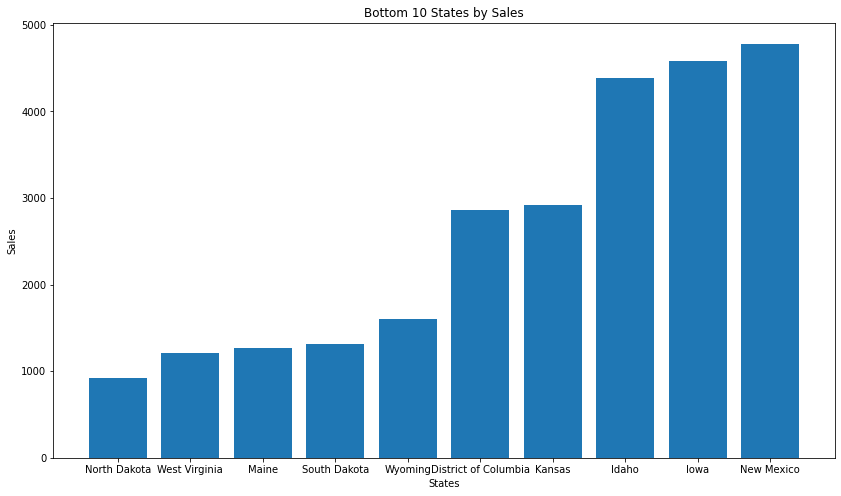

In [7]:
bottomten = grouped_sorted.nsmallest(10, columns=['Sales'])
plt.figure(figsize=(14, 8))
plt.xticks(range(len(bottomten)), bottomten.State)
plt.xlabel('States')
plt.ylabel('Sales')
plt.title('Bottom 10 States by Sales')
plt.bar(range(len(bottomten)), bottomten.Sales) 
plt.show()

##Most and least profitting states

####Top 10 states by profit

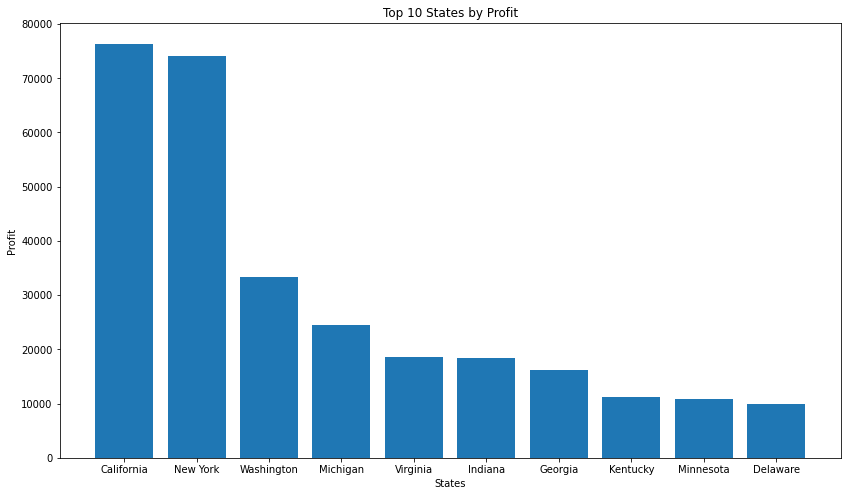

In [19]:
grouped = df.groupby(['State'], as_index=False)['Profit'].sum().reset_index()
grouped_sorted = grouped.sort_values('Profit', ascending=False)
grouped_sorted = grouped_sorted.drop('index', axis = 1)
Profittopten = grouped_sorted.nlargest(10, columns=['Profit'])
plt.figure(figsize=(14, 8))
plt.xticks(range(len(Profittopten)), Profittopten.State)
plt.xlabel('States')
plt.ylabel('Profit')
plt.title('Top 10 States by Profit')
plt.bar(range(len(Profittopten)), Profittopten.Profit) 
plt.show()

despite the huge sale gap between California and New York. There's almost no difference in profit between them

####Bottom 10 states by profit

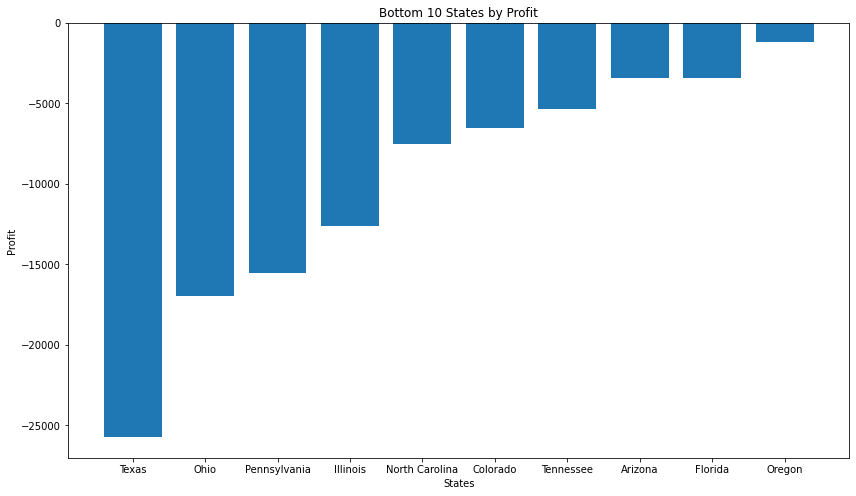

In [20]:
Profitbottomten = grouped_sorted.nsmallest(10, columns=['Profit'])
plt.figure(figsize=(14, 8))
plt.xticks(range(len(Profitbottomten)), Profitbottomten.State)
plt.xlabel('States')
plt.ylabel('Profit')
plt.title('Bottom 10 States by Profit')
plt.bar(range(len(Profitbottomten)), Profitbottomten.Profit) 
plt.show()

###Sales and profit of Sub-Catagories

####Sales

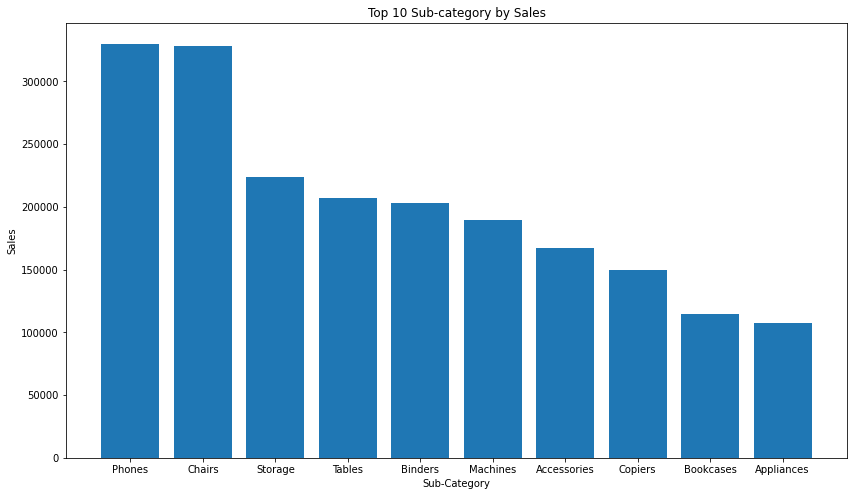

In [32]:
GroupedSC = df.groupby(['Sub-Category'], as_index=False)['Sales'].sum().reset_index()
groupedSC_sorted = GroupedSC.sort_values('Sales', ascending=False)
groupedSC_sorted = groupedSC_sorted.drop('index', axis = 1)
SCtopten = groupedSC_sorted.nlargest(10, columns=['Sales'])
plt.figure(figsize=(14, 8))
plt.xticks(range(len(SCtopten)), SCtopten['Sub-Category'])
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Top 10 Sub-category by Sales')
plt.bar(range(len(SCtopten)), SCtopten.Sales) 
plt.show()

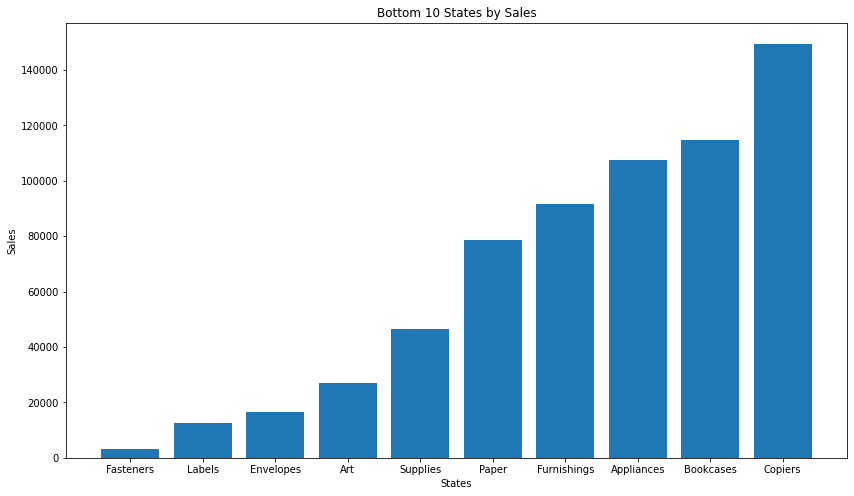

In [33]:
SCbottomten = groupedSC_sorted.nsmallest(10, columns=['Sales'])
plt.figure(figsize=(14, 8))
plt.xticks(range(len(SCbottomten)), SCbottomten['Sub-Category'])
plt.xlabel('States')
plt.ylabel('Sales')
plt.title('Bottom 10 States by Sales')
plt.bar(range(len(SCbottomten)), SCbottomten.Sales) 
plt.show()

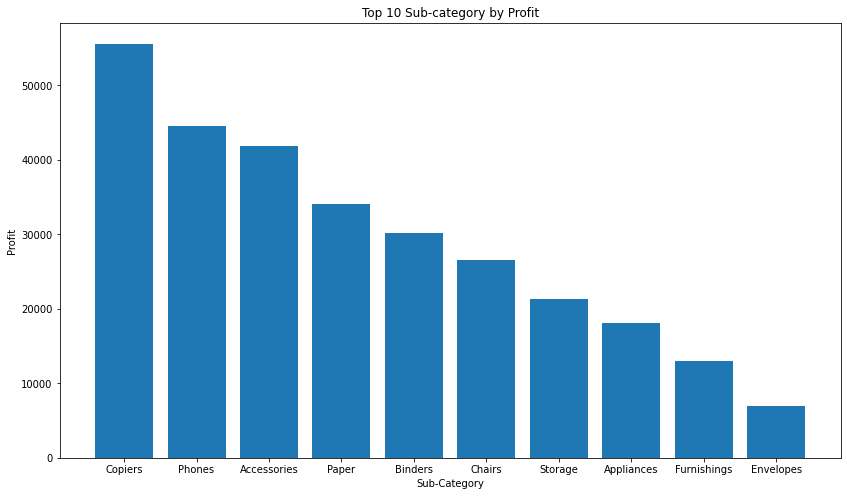

In [36]:
GroupedSCProfit = df.groupby(['Sub-Category'], as_index=False)['Profit'].sum().reset_index()
groupedSCProfit_sorted = GroupedSCProfit.sort_values('Profit', ascending=False)
groupedSCProfti_sorted = groupedSCProfit_sorted.drop('index', axis = 1)
SCtoptenProfit = groupedSCProfit_sorted.nlargest(10, columns=['Profit'])
plt.figure(figsize=(14, 8))
plt.xticks(range(len(SCtoptenProfit)), SCtoptenProfit['Sub-Category'])
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Top 10 Sub-category by Profit')
plt.bar(range(len(SCtoptenProfit)), SCtoptenProfit.Profit) 
plt.show()

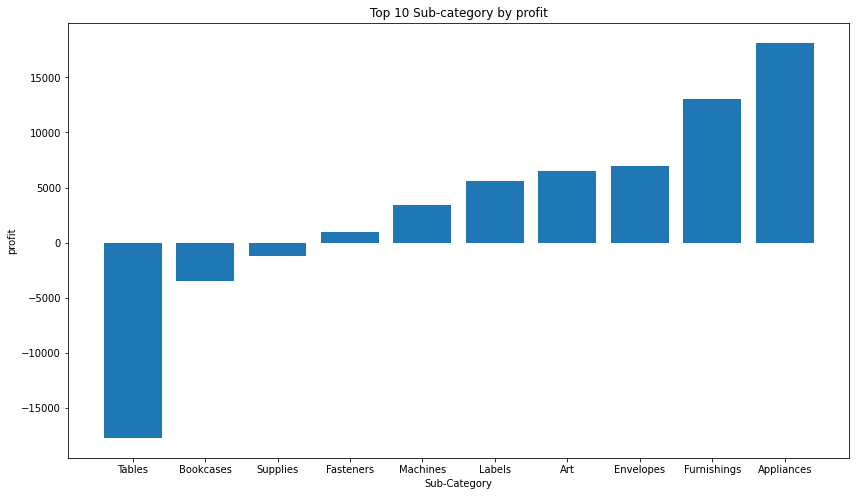

In [37]:

SCBottomtenProfit = groupedSCProfit_sorted.nsmallest(10, columns=['Profit'])
plt.figure(figsize=(14, 8))
plt.xticks(range(len(SCBottomtenProfit)), SCBottomtenProfit['Sub-Category'])
plt.xlabel('Sub-Category')
plt.ylabel('profit')
plt.title('Top 10 Sub-category by profit')
plt.bar(range(len(SCBottomtenProfit)), SCBottomtenProfit.Profit) 
plt.show()